# Method-1

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import cv2
from skimage.morphology import binary_closing, binary_dilation, binary_erosion, binary_opening
from skimage.morphology import selem

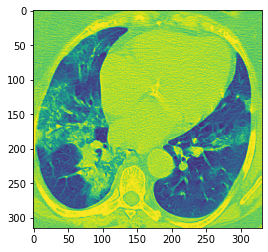

In [3]:
# Load our image as greyscale 
image = cv2.imread('New/C5.png', 0)
#cv2.imshow('Original', image)
#cv2.waitKey(0)  
#cv2.destroyAllWindows()
plt.imshow(image)
plt.show()

In [4]:
image.shape

(315, 331)

In [5]:
# Let's  re-sizing by setting  dimensions
img_scaled = cv2.resize(image, (224, 224), interpolation = cv2.INTER_NEAREST)
cv2.imshow('Scaling-Resize Size', img_scaled) 
cv2.waitKey()

cv2.destroyAllWindows()

In [6]:
img_scaled.shape

(224, 224)

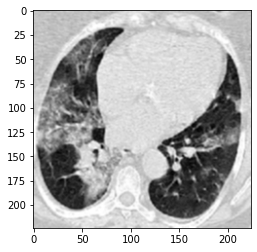

In [7]:
# It's good practice to blur images as it removes noise
image = cv2.GaussianBlur(img_scaled, (3, 3),0)
'''
cv2.imshow('Blured', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
plt.imshow(image, cmap='gray')
plt.show()

In [14]:
'''
image = cv2.GaussianBlur(img_scaled, (5, 5), 0)
cv2.imshow('Blured', image)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
cv2.imshow("Adaptive Mean Thresholding", thresh) 
cv2.waitKey(0) 
cv2.destroyAllWindows()
'''

'\nimage = cv2.GaussianBlur(img_scaled, (5, 5), 0)\ncv2.imshow(\'Blured\', image)\n\n# Using adaptiveThreshold\nthresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) \ncv2.imshow("Adaptive Mean Thresholding", thresh) \ncv2.waitKey(0) \ncv2.destroyAllWindows()\n'

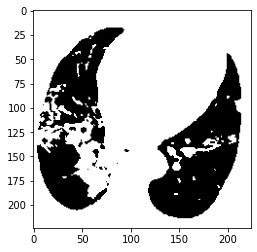

In [8]:
#Thresholding 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
'''
cv2.imshow("Otsu's Thresholding", th2) 
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
plt.imshow(th2, cmap='gray')
plt.show()

In [9]:
th2.shape

(224, 224)

In [10]:
pixels = cv2.countNonZero(np.float32(th2))   #White pixels i.e pixcel>0
pixels

35651

In [11]:
height=224
width=224

In [12]:
Black_pixcel= (height*width)-pixels
Black_pixcel

14525

In [13]:
#Checking equivalent of pixels 
(height*width) == Black_pixcel+pixels

True

# Area Calculation 

In [111]:
'''
import PIL
from PIL import ImageOps
import cv2
import numpy as np
import matplotlib.pyplot as plt
'''

'\nimport PIL\nfrom PIL import ImageOps\nimport cv2\nimport numpy as np\nimport matplotlib.pyplot as plt\n'

In [112]:
'''
img = cv2.imread('New/C5.png')
plt.imshow(img)
plt.show()
'''

"\nimg = cv2.imread('New/C5.png')\nplt.imshow(img)\nplt.show()\n"

In [14]:
#img1= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img2= cv2.resize(image, (224,224))

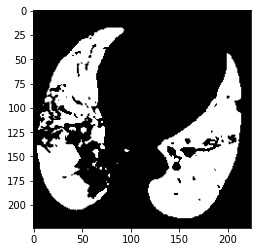

In [15]:
from skimage import filters
#camera = data.camera()
val = filters.threshold_otsu(img2)
mask = img2 < val
plt.imshow(mask,cmap='gray')
plt.show()

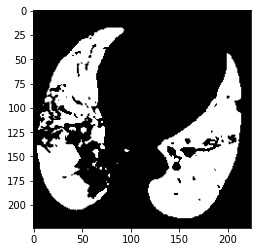

'\nfrom skimage.measure import label\n\nlabel_image = label(cleared)\nplt.imshow(label_image,cmap = plt.cm.gray)\nplt.show()\n'

In [16]:
#Labeling image into connected regions of an integer array.Label the image.

from skimage.segmentation import clear_border

cleared = clear_border(mask)
plt.imshow(cleared, cmap = plt.cm.gray)
plt.show()

'''
from skimage.measure import label

label_image = label(cleared)
plt.imshow(label_image,cmap = plt.cm.gray)
plt.show()
'''

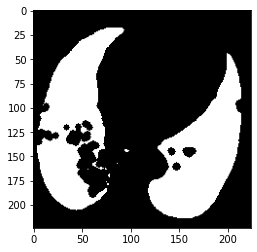

In [17]:
#Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks.
#Closure operation with a disk of radius 10. This operation is to keep nodules attached to the lung wall.

from skimage.morphology import binary_closing, disk, binary_dilation, binary_erosion, binary_opening
from skimage.morphology import selem

'''
selem = disk(2)
binary = binary_erosion(label_image, selem)
plt.imshow(binary, cmap = plt.cm.gray)
plt.show()
'''

selem = disk(3)
binary = binary_closing(cleared, selem)
plt.imshow(binary, cmap = plt.cm.gray)
plt.show()

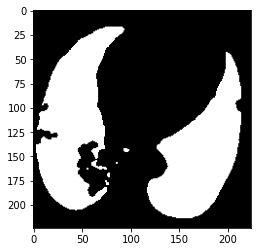

In [18]:
from skimage.filters import roberts
from scipy import ndimage as ndi

edges = roberts(binary)
binary = ndi.binary_fill_holes(edges)
binary1 = ndi.binary_fill_holes(binary)
#binary2 = ndi.binary_fill_holes(binary1)
plt.imshow(binary, cmap = plt.cm.gray)
plt.show()

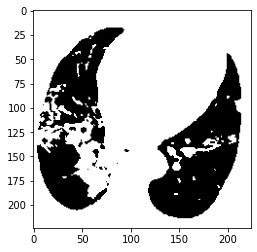

In [22]:
plt.imshow(th2, cmap='gray')
plt.show()

In [19]:
pixels_white = cv2.countNonZero(np.float32(binary))   #White pixels i.e pixcel>0
pixels_white

17250

In [20]:
infected_pixels= pixels_white-Black_pixcel
infected_pixels

2725

In [21]:
severity_Score= infected_pixels/pixels_white
print("Infection/severity_Score: ", severity_Score)

severity_percentage= (severity_Score)*100
print("Percentage of infection/Severity:", severity_percentage)

Infection/severity_Score:  0.15797101449275364
Percentage of infection/Severity: 15.797101449275363


# Method-2

In [98]:
import cv2

# Load our image 
image1 = cv2.imread('New/C1.png')
cv2.imshow('Original', image1)
cv2.waitKey(0)  
cv2.destroyAllWindows()

In [99]:
image1.shape

(296, 331, 3)

In [100]:
# Let's  re-sizing by setting  dimensions
img_scaled1 = cv2.resize(image1, (224, 224), interpolation = cv2.INTER_NEAREST)
cv2.imshow('Original', image1)
cv2.imshow('Scaling-Resize Size', img_scaled1) 
cv2.waitKey()

cv2.destroyAllWindows()

In [101]:
img_scaled1.shape

(224, 224, 3)

In [102]:
# Grayscale
gray = cv2.cvtColor(img_scaled1,cv2.COLOR_BGR2GRAY)
cv2.imshow('gray_Image', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [103]:
gray.shape

(224, 224)

In [104]:
# Grayscale
'''
gray = cv2.cvtColor(img_scaled1,cv2.COLOR_BGR2GRAY)
cv2.imshow('gray_Image', gray)
cv2.waitKey(0)
'''

image = cv2.GaussianBlur(gray, (5, 5), 0)
cv2.imshow('Blured', image)

import numpy as np

# Let's define our kernel size
kernel = np.ones((3,3), np.uint8)

'''
# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
cv2.imshow('Original', image1)
cv2.imshow('Dilation', dilation)
cv2.waitKey(0)

# Opening - Good for removing noise
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
cv2.imshow('Opening', opening)
cv2.waitKey(0)

#cv2.destroyAllWindows()

'''
# Now we erode
erosion = cv2.erode(image, kernel, iterations = 4)
cv2.imshow('Erosion', erosion)
cv2.waitKey(0)

#Closing - Good for removing noise
closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel)
cv2.imshow('Closing', closing)
cv2.waitKey(0)

canny = cv2.Canny(closing, 200, 224)
cv2.imshow('Canny', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [105]:
#Contour section 

contours, hierarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Canny Edges After Contouring', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [106]:
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 26


In [107]:
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [108]:
def get_contour_areas(contours):
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

In [109]:
# Let's print the areas of the contours before sorting
print("Contor Areas")
print(get_contour_areas(contours))

Contor Areas
[0.0, 3.5, 0.5, 7.0, 3.5, 0.0, 1.0, 11.5, 61.0, 2.0, 0.5, 0.0, 1.5, 0.0, 4.5, 20.5, 0.5, 8.5, 0.5, 2.0, 51.5, 0.5, 1.0, 8.5, 26.5, 32.5]


# Method-3

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [111]:
image2 = cv2.imread('New/C1.png')

In [112]:
image2.shape

(296, 331, 3)

In [113]:
image21 = cv2.resize(image2, (224, 224), interpolation = cv2.INTER_NEAREST)

In [114]:
image21.shape

(224, 224, 3)

In [115]:
image22 = cv2.cvtColor(image21, cv2.COLOR_BGR2GRAY)
image22.shape

(224, 224)

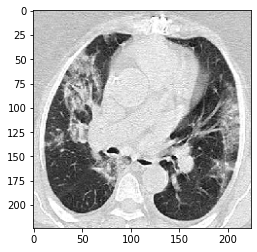

In [116]:
plt.imshow(image22, cmap='gray');

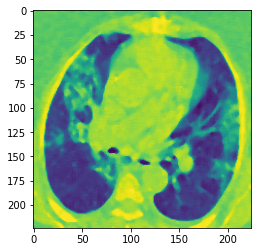

In [117]:
#denoising the image, removing noise

from skimage import filters

image_denoised = filters.median(image22, selem=np.ones((5, 5)))
plt.imshow(image_denoised);

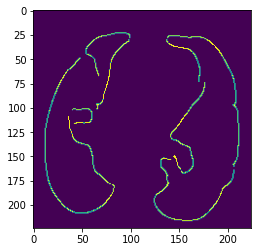

In [118]:

#finding edges of an image, we can regulate simga value to get more lines

import skimage
from skimage import feature
edges = skimage.feature.canny(image22, sigma=5)

plt.imshow(edges);

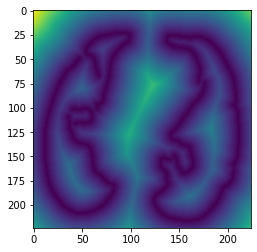

In [119]:
#Appling landscap and where the images levels joins that could be new region. So that we have used Eculidian distance transformed 

from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)       #This tells us how far is foregound and backround are from the 

plt.imshow(dt);

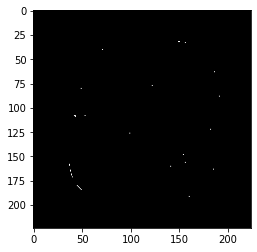

In [120]:
local_max = feature.peak_local_max(dt, indices=False, min_distance=5)   #Detecting the peaks of an image. 
plt.imshow(local_max, cmap='gray');

In [121]:

peak_idx = feature.peak_local_max(dt, indices=True, min_distance=5)  #It will represent the peaks values 
peak_idx[:5]

array([[ 77, 122],
       [126,  99],
       [122, 182],
       [191, 160],
       [168,  39]], dtype=int64)

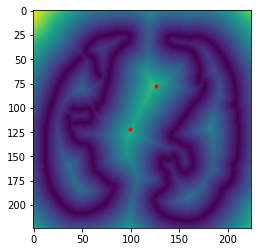

In [123]:
plt.plot(peak_idx[1], peak_idx[0], 'r.')    #Ploting it and seeing the peaks 
plt.imshow(dt);

In [124]:
from skimage import measure     #Label the image and giving them individual numbers and these numbers used by labels 
markers = measure.label(local_max)

c:\users\ram shankar\anaconda3\envs\medical_imaging\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


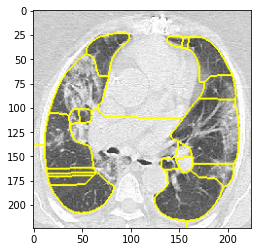

In [125]:
#We are going to invert this map so that lower area is high and high are is low. That means center of the point will 
#become trough and the edge become peak 

from skimage import morphology, segmentation

labels = morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(image22, labels));

c:\users\ram shankar\anaconda3\envs\medical_imaging\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


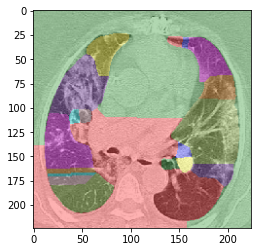

In [126]:
from skimage import color      #Giving color to the labes 
plt.imshow(color.label2rgb(labels, image=image22));

c:\users\ram shankar\anaconda3\envs\medical_imaging\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


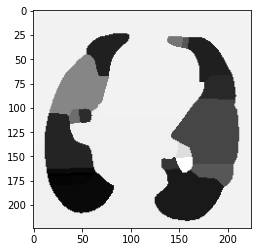

In [127]:
#Another visualization, but use 'avg' to average the pixel values 
m= color.label2rgb(labels, image=image22, kind='avg')
plt.imshow(m,cmap='gray' );

In [128]:
m.shape

(224, 224)

In [129]:
image11 = m.copy()

In [130]:
#image11.shape

In [131]:
#spliting foreground and background of an image 

regions = measure.regionprops(labels, intensity_image=image22)

In [134]:
x= [prop.area for prop in regions]#Number of pixels of the region.
x

[147,
 69,
 1033,
 1141,
 21369,
 2293,
 762,
 136,
 166,
 3613,
 11232,
 182,
 208,
 2007,
 183,
 687,
 250,
 148,
 382,
 1552,
 2616]

In [133]:
sum(x)

50176

In [40]:
224*224

50176

In [135]:
a= [prop.bbox_area for prop in regions] #Number of pixels of bounding box.
a

[192,
 84,
 1936,
 2116,
 50176,
 3904,
 975,
 165,
 210,
 4690,
 19434,
 289,
 272,
 2907,
 247,
 1056,
 306,
 200,
 470,
 2730,
 3834]

In [42]:
sum(a)

96193

In [136]:
[prop.bbox for prop in regions]   #Pixels belonging to the bounding box are in the half-open interval 
                                  #(min_row, min_col, max_row, max_col)

[(27, 138, 39, 154),
 (28, 153, 40, 160),
 (24, 55, 68, 99),
 (28, 159, 74, 205),
 (0, 0, 224, 224),
 (45, 17, 109, 78),
 (67, 170, 92, 209),
 (102, 37, 117, 48),
 (101, 47, 116, 61),
 (91, 142, 158, 212),
 (101, 0, 224, 158),
 (135, 146, 152, 163),
 (151, 147, 167, 164),
 (106, 12, 163, 63),
 (151, 132, 164, 151),
 (158, 162, 182, 206),
 (162, 14, 168, 65),
 (167, 15, 171, 65),
 (170, 15, 180, 62),
 (167, 18, 209, 83),
 (163, 125, 217, 196)]

In [137]:
b= [prop.convex_area for prop in regions]  #Number of pixels of convex hull image, which is the smallest convex
                                            #polygon that encloses the region.

In [138]:
sum(b)

80322

In [139]:
[prop.intensity_image for prop in regions] #Image inside region bounding box.

[array([[  0, 207, 221, 209, 213, 222, 217, 228, 243, 230, 215, 225, 219,
         211, 206,   0],
        [  0, 114, 145, 143, 152, 159, 171, 171, 175, 194, 190, 189, 187,
         210, 227, 238],
        [107,  61,  91, 118, 107, 111,  97, 129, 128, 121, 152, 136, 135,
         161, 173, 204],
        [155, 110, 114, 107,  83,  83,  84,  91,  85, 102, 125, 112, 106,
         100,  93, 109],
        [197, 159, 148, 125,  89,  88,  98,  95,  81,  71,  72, 101,  99,
          88,  85,  80],
        [208, 187, 192, 206, 168, 109,  94, 101, 111, 107, 107, 160, 146,
          99, 105,  95],
        [  0, 212, 215, 210, 192, 179, 180, 118, 115, 125,  96, 125, 125,
          94,  85,   0],
        [  0,   0, 216, 250, 236, 177, 175, 180, 181, 144, 124,  97, 113,
          96,  64,   0],
        [  0,   0,   0,   0, 214, 205, 205, 206, 206, 206, 207, 171, 161,
         143, 129,   0],
        [  0,   0,   0,   0,   0,   0, 212, 209, 206, 198, 195, 190, 182,
         193, 181,   0],
        [ 

In [140]:
[prop.label for prop in regions]  #The label in the labeled input image

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [141]:
measure.regionprops?

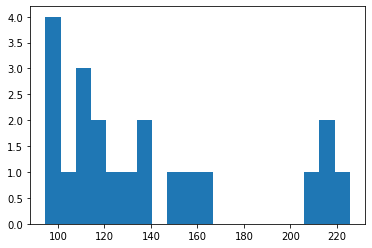

In [142]:
#Drawing the histogram to see the seperation of an image. 

region_means = [r.mean_intensity for r in regions]
plt.hist(region_means, bins=20);

In [50]:
#region_means

In [51]:
#Doing clustering of foreground and background intentities. 

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

region_means = np.array(region_means).reshape(-1, 1)
model.fit(np.array(region_means).reshape(-1, 1))
print(model.cluster_centers_)

[[108.20381442]
 [217.75621261]
 [146.18215245]]


In [52]:
bg_fg_labels = model.predict(region_means)  #Predicting labels for each of the regions 
bg_fg_labels

array([2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0])

In [53]:
classified_labels = labels.copy()
#Labeling with predicted labels and with different regions and re-labeling the image. 

for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

c:\users\ram shankar\anaconda3\envs\medical_imaging\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """Entry point for launching an IPython kernel.


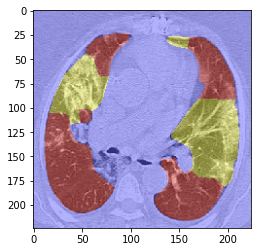

In [54]:
mn= color.label2rgb(classified_labels, image=image22)

plt.imshow(mn);

In [55]:
mn.shape

(224, 224, 3)

In [56]:
#image_mask= mn.copy()

In [57]:
width, height, depth = image21.shape    

In [58]:
combinedImage1 = cv2.merge((image21, image11))

In [59]:
#cv2.imwrite('combine_CT.png',combinedImage1)  #Save

True

In [60]:
cv2.imshow('original', image21)
cv2.imshow('Mape', combinedImage1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [73]:
combinedImage1.shape

(224, 224, 4)

# Method 3